## Perceived importance of Covid-19 in college students, what factors make a difference?

![College Covid Picture](assets/CollegeCovid.jpeg)

## Refer to the 

In [1]:
#This cell loads the packages we will need to run our code
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

## 1. Read the Data In
In this cell I will read in the raw study responses file into the data frame and display the headers of my columns to make sure the data was loaded in correctly 



In [2]:
df = pd.read_excel('data/Raw_Study_Responses.xlsx')
headers_df = pd.read_excel('data/Raw_Study_Responses.xlsx', header=0)
print(headers_df.columns)

Index(['Timestamp', 'Have you read the informed consent linked above? ',
       'Are you at least 18 years old?', 'What is your biological sex?',
       'What is your college major?', 'What grade in college are you?',
       'Have you or has anyone you know ever contracted Covid-19?',
       'How important is taking proper precautions to prevent exposure to Covid-19 to you?',
       'How important is getting vaccinated against Covid-19 to you?',
       'How important is wearing masks to help slow the spread of transmission of Covid-19 to you?',
       'How important is social distancing to help slow the spread of Covid-19 to you?',
       'Have you received any vaccinations to help prevent Covid-19?',
       'If no to the above question, do you plan on getting a vaccination to help prevent Covid-19?',
       'How important will Covid-19 be in your selected field of study once you graduate?',
       'My college has taken proper steps in preventing the spread of Covid-19',
       'My col

## 2. Clean the data
As you can see from step 1, my column names are quite long, here I will clean various columns in my data and copy the new data into a new excel file. 

In [3]:
#1. I will change the column names from the questions to a dictionary with shorter names
new_names = {'What is your biological sex?': 'biosex',
             'What is your college major?': 'college_major',
             'What grade in college are you?': 'college_grade',
             'Have you or has anyone you know ever contracted Covid-19?': 'question_1',
             'How important is taking proper precautions to prevent exposure to Covid-19 to you?': 'question_2',
             'How important is getting vaccinated against Covid-19 to you?': 'question_3',
             'How important is wearing masks to help slow the spread of transmission of Covid-19 to you?': 'question_4',
             'How important is social distancing to help slow the spread of Covid-19 to you?': 'question_5',
             'Have you received any vaccinations to help prevent Covid-19?': 'question_6',
             'My college classes have updated their curriculum in response to Covid-19': 'question_7'}
df = df.rename(columns=new_names)

#2. Here I will drop unneeded columns from this study
df = df.drop(columns=['If no to the above question, do you plan on getting a vaccination to help prevent Covid-19?', 'How important will Covid-19 be in your selected field of study once you graduate?', 'My college has taken proper steps in preventing the spread of Covid-19'])

#3. Here I will remove subjects under the age of 18
df = df[df['Are you at least 18 years old?'] == 'Yes']

#4. Here I will drop all rows that are either blank, say "Undecided" or "Dual Credit" from the college_major column
df = df.drop(df[(df['college_major'] == '') | (df['college_major'] == 'Undecided') | (df['college_major'] == 'Dual Credit')].index)

#5. Here I will create a list of STEM majors covered in my study, then create a column and categorize answers for STEM vs non-STEM majors
stem_majors = ['Nursing', 'Digital Marketing', 'Psychology', 'Exercise Science', 'Health and Physical Education', 'Secondary Math Education', 'Elementary Education', 'Biology', 'Education', 'Health Promotion', 'Physical Education', 'Chemistry']
df["college_major"] = df["college_major"].astype(str).str.strip()
df["STEMvsNon-STEM"] = df["college_major"].apply(lambda x: "STEM" if x in stem_majors else "Non-STEM")

#6. Now I will save everything to a new data file
df.to_excel('data/updated_data.xlsx', index=False)
    


## 3. Visualize the data
All this data looks boring, lets spruce it up a bit with some graphs

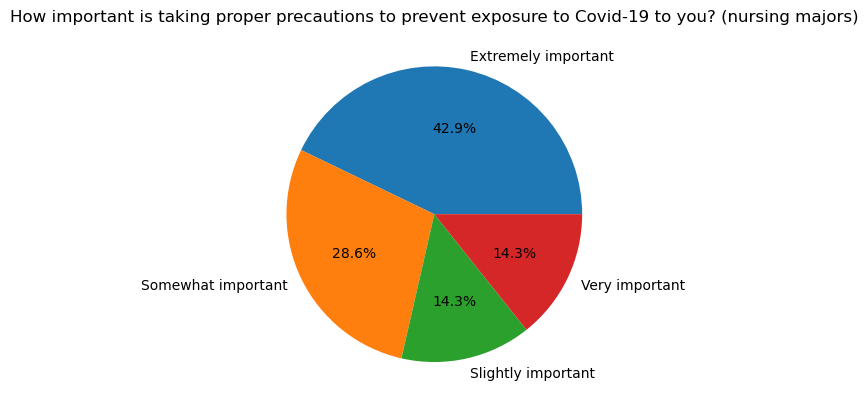

In [4]:
#1. Load in our new edited spreadsheet 
df = pd.read_excel('data/updated_data.xlsx')

#2. Basic pie chart showing the answers of nurses to question_2 (How important is taking proper precautions to prevent exposure to Covid-19 to you?)
nursing_df = df[df['college_major'] == 'Nursing']
non_nursing_df = df[df['college_major'] != 'Nursing']
counts = nursing_df['question_2'].value_counts()
counts_nn = non_nursing_df['question_2'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (nursing majors)')
plt.show()

## These answers were on a scale of: Not at all important, Slightly important , Somewhat important , Very important and Extremely important. Luckily, no nursing major answered "Not at all important" but the next two answer choices, Slightly and Somewhat important, combined to make up over 42% of the answers to the question. 

## Lets see the same chart but with non-nursing majors

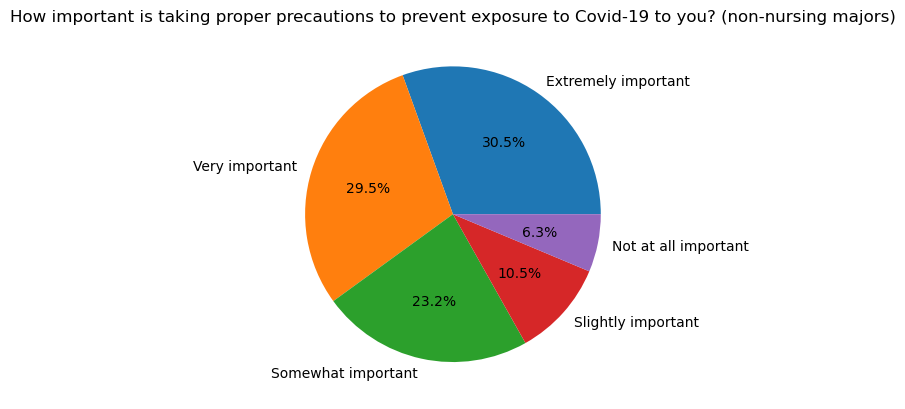

In [5]:
#3. Same question, but for non-nursing majors
plt.pie(counts_nn, labels=counts_nn.index, autopct='%1.1f%%')
plt.title('How important is taking proper precautions to prevent exposure to Covid-19 to you? (non-nursing majors)')
plt.show()